In [130]:
import pandas as pd
import seaborn as sns
import random
import math

In [131]:
data = pd.read_csv('data.csv')

In [132]:
# Zadanie 1 a) - Analiza danych
# Jak widać na podstawie poniższej tabeli, odchylenie standardowe w każdej z pierwszych trzech kolumn jest znacząca większe od średniej, co sugeruje, że wartości dla poszczególnych kolumn mogą się znacząco różnić
data.describe()

,kol1,kol2,kol3,kol4,type
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


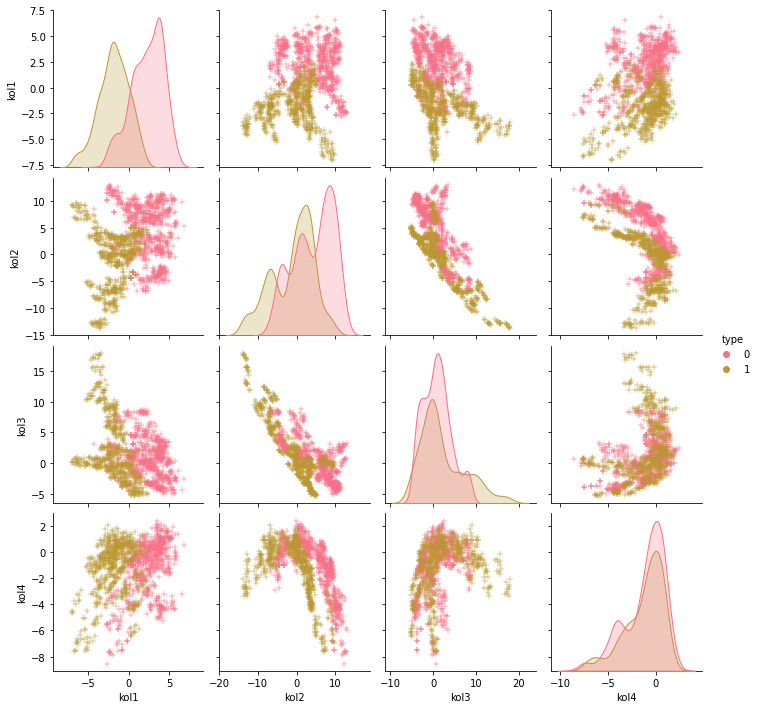

In [133]:
sns.set_palette('husl')
sns.pairplot(data, hue='type', markers='+')
# Jak widać na poniższych wykresach, zbiory pokrywają się dość znacznie w kilku kategoriach, co utrudnia klasyfikację, zwłaszcza gołhym okiem.

<AxesSubplot:xlabel='type', ylabel='kol1'>

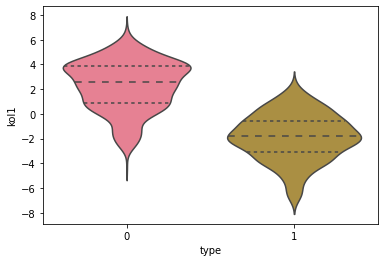

In [134]:
sns.violinplot(y='kol1', x='type', inner='quartile', data=data)
# Jak widać na poniższym wykresie, dane w kolumnie pierwszej nachodzą na siebie w nieznacznym stopniu, co może utrudnić klasyfikację.

<AxesSubplot:xlabel='type', ylabel='kol2'>

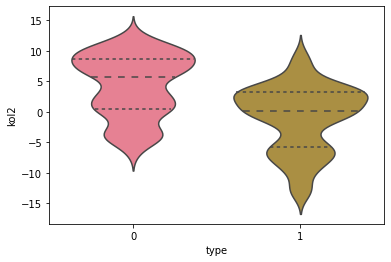

In [135]:
sns.violinplot(y='kol2', x='type', inner='quartile', data=data)
# Z kolei na poniższym wykresie mediany są bardzo blisko siebie, co również może utrudnić klasyfikację.

In [149]:
# Zadanie 1 b) - Klasa ProcessingData
class ProcessingData:

    # metoda tasująca wiersze pd.DataFrame
    @staticmethod
    def ShuffleData(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        for idx in range(len(df) - 1, 0, -1):
            rand_idx = random.randint(0, idx)
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        return df

    # metoda normalizująca kolumny pd.DataFrame
    @staticmethod
    def NormalizeData(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda dzieląca pd.DataFrame na zbiór treningowy oraz walidacyjny
    @staticmethod
    def SplitData(df: pd.DataFrame, x: int, y: int) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param x: int
        :param y: int
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        if x + y != 100:
            print("Invalid x and/or y argument.")
        else:
            cutoff = int(len(df) * x / 100)
            return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [150]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.ShuffleData(data)
shuffled_data

,kol1,kol2,kol3,kol4,type
0,-0.94255,0.039307,-0.24192,0.31593,1
1,-2.32770,1.438100,-0.82114,-1.28620,1
2,-1.41060,-7.108000,5.64540,0.31335,1
3,3.46690,6.870000,-1.05680,-0.73147,0
4,-1.57680,10.843000,2.54620,-2.93620,0
...,...,...,...,...,...
1367,0.34340,0.124150,-0.28733,0.14654,1
1368,-1.73440,2.017500,7.76180,0.93532,0
1369,2.22790,4.095100,-4.80370,-2.11120,1
1370,4.83680,10.013200,-4.32390,-4.32760,0


In [151]:
normalized_data = ProcessingData.NormalizeData(shuffled_data, 'type')
normalized_data

,kol1,kol2,kol3,kol4,type
0,-0.484137,-0.320844,-0.380403,0.717552,1
1,-0.971391,-0.082510,-0.514792,-0.044999,1
2,-0.648783,-1.538641,0.985555,0.716324,1
3,1.066978,0.843007,-0.569469,0.219031,0
4,-0.707247,1.519948,0.266488,-0.830334,0
...,...,...,...,...,...
1367,-0.031777,-0.306388,-0.390939,0.636929,1
1368,-0.762686,0.016212,1.476596,1.012358,0
1369,0.631134,0.370204,-1.438813,-0.437667,1
1370,1.548868,1.378562,-1.327491,-1.492586,0


In [154]:
# Test dla normalizacji 80:20
normalized_training_data, normalized_validation_data = ProcessingData.SplitData(normalized_data, 80, 20)
normalized_training_data

,kol1,kol2,kol3,kol4,type
0,-0.484137,-0.320844,-0.380403,0.717552,1
1,-0.971391,-0.082510,-0.514792,-0.044999,1
2,-0.648783,-1.538641,0.985555,0.716324,1
3,1.066978,0.843007,-0.569469,0.219031,0
4,-0.707247,1.519948,0.266488,-0.830334,0
...,...,...,...,...,...
1092,0.152536,0.620535,0.064703,0.487368,0
1093,0.882369,0.935032,-0.550975,0.146404,0
1094,0.734836,0.053594,0.307648,0.945276,0
1095,0.109568,0.291929,-1.346169,-1.403962,1


In [155]:
normalized_validation_data

,kol1,kol2,kol3,kol4,type
0,0.708770,-1.403951,1.523324,0.665239,0
1,0.897671,0.910701,-0.419168,-0.500446,0
2,-0.956723,-1.255869,1.022330,0.987127,1
3,1.083968,0.834897,-0.480599,0.343966,0
4,0.699941,1.296777,-1.038630,-0.753419,0
...,...,...,...,...,...
270,-0.031777,-0.306388,-0.390939,0.636929,1
271,-0.762686,0.016212,1.476596,1.012358,0
272,0.631134,0.370204,-1.438813,-0.437667,1
273,1.548868,1.378562,-1.327491,-1.492586,0


In [156]:
# Test dla normalizacji 60:40
normalized_training_data, normalized_validation_data = ProcessingData.SplitData(normalized_data, 60, 40)
normalized_training_data

,kol1,kol2,kol3,kol4,type
0,-0.484137,-0.320844,-0.380403,0.717552,1
1,-0.971391,-0.082510,-0.514792,-0.044999,1
2,-0.648783,-1.538641,0.985555,0.716324,1
3,1.066978,0.843007,-0.569469,0.219031,0
4,-0.707247,1.519948,0.266488,-0.830334,0
...,...,...,...,...,...
818,1.288347,1.408533,-1.236633,-1.423620,0
819,0.306450,-0.353986,1.181772,0.208564,0
820,-0.070050,-1.096865,0.167487,1.254850,1
821,1.478268,-0.780954,0.333680,1.137907,0


In [157]:
normalized_validation_data

,kol1,kol2,kol3,kol4,type
0,-1.345921,0.244341,-0.491335,-1.109771,1
1,1.171313,0.146318,-0.170866,0.729861,0
2,1.340972,-0.123402,-0.169673,1.017898,0
3,-1.171197,-2.375659,2.440185,-0.744185,1
4,-2.333658,1.151507,-0.322154,-1.195301,1
...,...,...,...,...,...
544,-0.031777,-0.306388,-0.390939,0.636929,1
545,-0.762686,0.016212,1.476596,1.012358,0
546,0.631134,0.370204,-1.438813,-0.437667,1
547,1.548868,1.378562,-1.327491,-1.492586,0


In [141]:
# Zadanie 2 - Klasyfikator Bayesa
from functools import reduce


class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    labels: list[str] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza licząca średnią wartość w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value.
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda pomocnicza licząca odchylenie standardowe wartości w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczająca gęstość prawdopodobieństwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns it's Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return probability: float
        """
        if x < m - math.sqrt(6) * sd or x > m + math.sqrt(6) * sd:
            return 0
        elif m >= x >= m - math.sqrt(6) * sd:
            return (x - m) / (6 * sd ** 2) + 1 / (math.sqrt(6) * sd)
        else:
            return -(x - m) / (6 * sd ** 2) + 1 / (math.sqrt(6) * sd)

    # metoda obliczająca wartości przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.values = []
        self.labels = df[label].unique()
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            column = [[self.mean(data), self.std_dev(data, self.mean(data))] for _, data in category_values.items()]
            self.values.append(column)

    # metda przewidująca etykiety klas próbek
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category in self.values:
            category_pairs = []
            for pair, x in zip(category, sample):
                category_pairs.append(self.density(x, pair[0], pair[1]))
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność przewidywań
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is.
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [158]:
# Test Bayesa dla danych znormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.ShuffleData(data)
    normalized_data = ProcessingData.NormalizeData(shuffled_data, 'type')
    normalized_training_data, normalized_validation_data = ProcessingData.SplitData(normalized_data, 70, 30)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'type')
    NB.test(normalized_validation_data, 'type')

Accuracy: 86.17%; 355/412
Accuracy: 80.83%; 333/412
Accuracy: 84.22%; 347/412
Accuracy: 82.52%; 340/412
Accuracy: 80.34%; 331/412


In [193]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.ShuffleData(data)
    training_data, validation_data = ProcessingData.SplitData(shuffled_data, 70, 30)

    NB = NaiveBayes()
    NB.calculate(training_data, 'type')
    NB.test(validation_data, 'type')

Accuracy: 78.64%; 324/412
Accuracy: 78.88%; 325/412
Accuracy: 80.58%; 332/412
Accuracy: 83.50%; 344/412
Accuracy: 83.01%; 342/412


In [194]:
# Zadanie 3 - Klasyfikator miękki
import bisect


class SoftSetClassifier:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    means: list[list[float]] = []

    # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value.
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            for _, data in category_values.items():
                mean = self.mean(data)
                temp_mean.append(mean)
                # sorted_items = sorted(data)
                # cutoff = bisect.bisect(sorted_items, mean)
                # lower, upper = sorted_items[:cutoff], sorted_items[cutoff:]
                # len_lower = len(lower)
                # len_upper = len(upper)
                len_lower = 0
                len_upper = 0
                for item in data:
                    if item > mean:
                        # print(f'{item}>{mean}')
                        len_upper += 1
                    else:
                        # print(f'{item}<{mean}')
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.means.append(temp_mean)
            self.pairs.append(temp_pair)
        print(self.pairs)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            for pair, m, x in zip(category, mean, sample):
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                elif x > m:
                    sample_pairs.append([1, 0])
                else:
                    sample_pairs.append([0, 1])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is.
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [195]:
# Test Klasyfikatora miękkiego
for i in range(5):
    shuffled_data = ProcessingData.ShuffleData(data)
    normalized_data = ProcessingData.NormalizeData(shuffled_data, 'type')
    normalized_training_data, normalized_validation_data = ProcessingData.SplitData(normalized_data, 70, 30)
    SSC = SoftSetClassifier()
    SSC.calculate(normalized_training_data, 'type')
    SSC.test(normalized_validation_data, 'type')

[[[1, 0], [1, 0], [0, 1], [1, 0]], [[1, 0], [1, 0], [0, 1], [1, 0]]]
Accuracy: 55.83%; 230/412
[[[1, 0], [1, 0], [0, 1], [1, 0]], [[1, 0], [1, 0], [0, 1], [1, 0]]]
Accuracy: 50.97%; 210/412
[[[1, 0], [1, 0], [0, 1], [1, 0]], [[1, 0], [1, 0], [0, 1], [1, 0]]]
Accuracy: 52.18%; 215/412
[[[1, 0], [1, 0], [0, 1], [1, 0]], [[1, 0], [1, 0], [0, 1], [1, 0]]]
Accuracy: 53.40%; 220/412
[[[1, 0], [1, 0], [0, 1], [1, 0]], [[0, 1], [1, 0], [0, 1], [1, 0]]]
Accuracy: 77.91%; 321/412


In [168]:
# Zadanie 4 - KNN
from collections import Counter

class KNN:

    # metoda obliczająca odległość między próbkami za pomocą metryki
    @staticmethod
    def distance(x: pd.Series, y: pd.Series, m: int) -> float:
        """
        :param x: pd.Series - a record from a dataset to calculate the distance
        :param y: pd.Series - a record from a dataset to calculate the distance
        :param m: int - to calculate the mth root in Euclidean metric
        :return: float - the distance between two records
        """
        s = 0
        for xi, yi in zip(x, y):
            if isinstance(xi, (float, int)) and isinstance(yi, (float, int)):
                s += pow(abs(xi - yi), m)
        return pow(s, 1 / m)

    # metoda przewidująca etykietę klasy próbki na podstawie etykiet jej k-najbliższych sąsiadów
    @staticmethod
    def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
        """
        :param sample: pd.Series - a record from the validation dataset
        :param training_set: pd.DataFrame - training dataset
        :param k: int - k-nearest elements
        :param m: int - to pass into KNN.distance
        :param label: str - name of the label that we want to predict
        :return: str - predicted label of the object
        """
        distances = [(KNN.distance(sample, training_set.iloc[idx], m), training_set.iloc[idx][label]) for idx in training_set.index]
        distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
        return max(dict(Counter(elem[1] for elem in distances)))

    # metoda testująca dokładność działania
    @staticmethod
    def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
        """
        :param training_set: pd.Series - a record from the validation dataset
        :param validation_set: pd.DataFrame - training dataset
        :param k0: int - starting value of k to pass into KNN.cluster
        :param kn: int - end value of k to pass into KNN.cluster
        :param m: int - to pass into KNN.cluster
        :param label: str - name of the label that we want to predict
        :return: None
        """
        for k in range(k0, kn + 1):
            correct = 0
            for sample in validation_set.iloc:
                x = KNN.cluster(sample, training_set, k, m, label)
                if x == sample[label]:
                    correct += 1
            print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [165]:
# Test KNN dla danych znormalizowanych
for i in range(2):
    shuffled_data = ProcessingData.ShuffleData(data)
    normalized_data = ProcessingData.NormalizeData(shuffled_data, 'type')
    normalized_training_data, normalized_validation_data = ProcessingData.SplitData(normalized_data, 70, 30)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=4, kn=4, m=1 , label='type')

Accuracy for k=4: 100.00%, correct predictions: 412/412
Accuracy for k=4: 100.00%, correct predictions: 412/412


In [196]:
# Test KNN dla danych nieznormalizowanych
for i in range(2):
    shuffled_data = ProcessingData.ShuffleData(data)
    training_data, validation_data = ProcessingData.SplitData(shuffled_data, 70, 30)
    KNN.test(training_set=training_data, validation_set=validation_data, k0=4, kn=4, m=1 , label='type')

Accuracy for k=4: 100.00%, correct predictions: 412/412
Accuracy for k=4: 100.00%, correct predictions: 412/412
